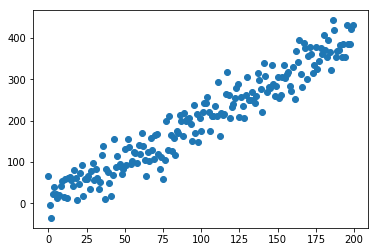

In [123]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30
np.random.seed(1398)

# datapoints
xx = np.arange(0,N)
y = theta1_act * xx + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
# Scatter plot of data
plt.scatter(xx,y)
plt.show()

In [129]:
# l-1 norm

# Construct the problem

# Get the matrix for x, dimension Nx2
x_ = np.ones([N,1])
x = np.insert(x_, 0, xx, axis=1)

# Define theta, matrix 2x1
theta = cvx.Variable((2, 1))

# Define slack variables, matrix Nx1
s_1 = cvx.Variable((N, 1))

# Define vector 1
c = np.array([1 for i in range(N)])

# Define objective functions
obj_1 = cvx.Minimize(c.T@s_1)

# Define constraints
const_1 = [y.T - x*theta <= s_1, y.T - x*theta >= -s_1]

# Define problem
prob_1 = cvx.Problem(obj_1, const_1)

# The optimal objective value
result_1 = prob_1.solve()
value_1 = theta.value


In [130]:
# l-inf norm

# Construct the problem
# Get the matrix for x, dimension Nx2
x_ = np.ones([N,1])
x = np.insert(x_, 0, xx, axis=1)

# Define theta, matrix 2x1
theta = cvx.Variable((2, 1))

# Define slack variables, matrix Nx1
s_2 = cvx.Variable((1, 1))

# Define vector 1
c = np.array([[1 for i in range(N)]])

# Define objective functions
obj_2 = cvx.Minimize(s_2)

# Define constraints
const_2 = [y.T - x*theta <= c.T@s_2, y.T - x*theta >= -c.T@s_2]

# Define problem
prob_2 = cvx.Problem(obj_2, const_2)

# The optimal objective value is returned
result_2 = prob_2.solve()
value_2 = theta.value



l_1 norm
Optimal value for theta is [[1.93432994]
 [9.67902795]], optimal value for function is 5145.655202353223.
The line of best fit is y = 1.9343299404808156*x + 9.679027951243883
l_inf norm
Optimal value for theta is [[  2.16099983]
 [-18.76708944]], optimal value for function is 84.61735170974461.
The line of best fit is y = 2.160999825937074*x + -18.767089438979184


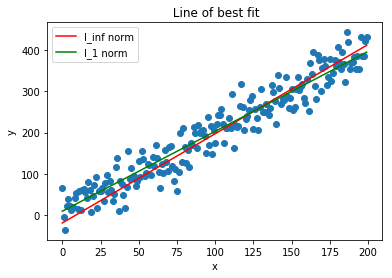

In [131]:
print('l_1 norm')
print('Optimal value for theta is {}, optimal value for function is {}.'.format(value_1, result_1))
print('The line of best fit is y = {}*x + {}'.format(value_1[0][0], value_1[1][0]))
yy_1 = xx*value_1[0][0] + value_1[1][0]
print('l_inf norm')
print('Optimal value for theta is {}, optimal value for function is {}.'.format(value_2, result_2))
print('The line of best fit is y = {}*x + {}'.format(value_2[0][0], value_2[1][0]))
yy_2 = xx*value_2[0][0] + value_2[1][0]
plt.figure()
# Scatter plot of data
plt.scatter(xx,y)
# Best fit line
plt.plot(xx, yy_2, color='red', label='l_inf norm')
plt.plot(xx, yy_1, color='green', label='l_1 norm')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(' Line of best fit')
plt.show()